In [84]:
# FILL IN THESE
trials = ['FACTORY','D50','D100','D150']
trialtype = 'Delay' #'Ramp' 'Extension'
subjectslist = ['Subject1', 'Subject2', 'Subject3', 'Subject4', 'Subject6l', 'Subject6r', 'Subject7', 'Subject8', 'Subject9', 'Subject10', 'Subject11', 'Subject12']
number_param = 'FoffFraction'
number_title = 'Stance percentage of stride'
vector_param = 'AnkleAnglesX'
vector_title = 'Ankle dorsiflexion'

# Don't fill in these
trials_legend = trials.copy()
for n in trials_legend:
    if n == 'FACTORY':
        if trialtype == 'Delay':
            trials_legend[trials_legend.index(n)] = 'D0'
        elif trialtype == 'Ramp':
            trials_legend[trials_legend.index(n)] = 'R200'
        elif trialtype == 'Extension':
            trials_legend[trials_legend.index(n)] = 'X200'
        else:
            raise IndexError('help me!')

import pickle
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
subjects = {}
for n in subjectslist:
    file = n + '.pkl'
    fileopen = open(file, 'rb')
    subjects[n] = pickle.load(fileopen)
    fileopen.close()
    trialnames = list(set(subjects[n].keys()))
print(subjectslist)

['Subject1', 'Subject2', 'Subject3', 'Subject4', 'Subject6l', 'Subject6r', 'Subject7', 'Subject8', 'Subject9', 'Subject10', 'Subject11', 'Subject12']


In [85]:
tempsubjects = subjectslist.copy()
for subject in tempsubjects:
    for trial in trials:
        if not subjects[subject][trial]:
            try:
                subjectslist.remove(subject)
                print('WARNING: %s has no trial for %s, subject has been removed from analysis.' %(subject,trial))
            except ValueError:
                print('WARNING: %s has no trial for %s, has already been removed from analysis.' %(subject,trial))   
        elif ('Left'+number_param and 'Right'+number_param) not in subjects[subject][trial]:
            try:
                subjectslist.remove(subject)
                print('WARNING: %s has no %s in trial %s, subject has been removed from analysis.' %(subject,number_param,trial))
            except ValueError:
                print('WARNING: %s has no %s in trial %s, has already been removed from analysis.' %(subject,number_param,trial))
        elif ('L'+vector_param and 'R'+vector_param) not in subjects[subject][trial]:
            try:
                subjectslist.remove(subject)
                print('WARNING: %s has no %s in trial %s, subject has been removed from analysis.' %(subject,vector_param,trial))
            except ValueError:
                print('WARNING: %s has no %s in trial %s, has already been removed from analysis.' %(subject,vector_param,trial))
paramnames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x]) is (float or int)]
print('Number parameters:')
print(sorted(paramnames))
vectornames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x]) is list]
print('Vector parameters:')
print(sorted(vectornames))
othernames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x])!=(list and float and int)]
print('Other parameters:')
print(sorted(othernames))

Number parameters:
['LeftFoffFraction', 'LeftSpeed', 'LeftSpeedCalc', 'LeftStepLen', 'LeftStepTime', 'LeftStrideLen', 'RightFoffFraction', 'RightSpeed', 'RightSpeedCalc', 'RightStepLen', 'RightStepTime', 'RightStrideLen']
Vector parameters:
['LANKX', 'LANKY', 'LANKZ', 'LASIX', 'LASIY', 'LASIZ', 'LAbsAnkleAngleX', 'LAbsAnkleAngleY', 'LAbsAnkleAngleZ', 'LAnkleAnglesX', 'LAnkleAnglesY', 'LAnkleAnglesZ', 'LFootProgressAnglesX', 'LFootProgressAnglesY', 'LFootProgressAnglesZ', 'LHEEX', 'LHEEY', 'LHEEZ', 'LHipAnglesX', 'LHipAnglesY', 'LHipAnglesZ', 'LKNEX', 'LKNEY', 'LKNEZ', 'LKneeAnglesX', 'LKneeAnglesY', 'LKneeAnglesZ', 'LPSIX', 'LPSIY', 'LPSIZ', 'LPelvisAnglesX', 'LPelvisAnglesY', 'LPelvisAnglesZ', 'LTHIX', 'LTHIY', 'LTHIZ', 'LTIBX', 'LTIBY', 'LTIBZ', 'LTOEX', 'LTOEY', 'LTOEZ', 'LeftAnkleAngle', 'RANKX', 'RANKY', 'RANKZ', 'RASIX', 'RASIY', 'RASIZ', 'RAbsAnkleAngleX', 'RAbsAnkleAngleY', 'RAbsAnkleAngleZ', 'RAnkleAnglesX', 'RAnkleAnglesY', 'RAnkleAnglesZ', 'RFootProgressAnglesX', 'RFootProgr

In [86]:
for subject in subjectslist:
    for trial in trials:
        for side in ['L','R']:
            try:
                toe = subjects[subject][trial][side+'TOEZ']
                subjects[subject][trial][side+'MaxtoeZ'] = max(toe[int(len(toe)*0.2):int(len(toe)*0.8)]) - min(toe)
                subjects[subject][trial][side+'MintoeZ'] = min(toe[int(len(toe)*0.2):int(len(toe)*0.8)]) - min(toe)
            except KeyError:
                continue

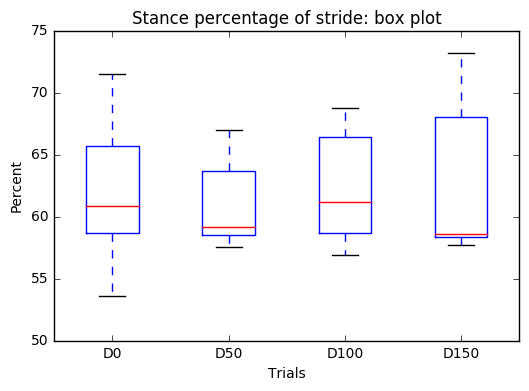

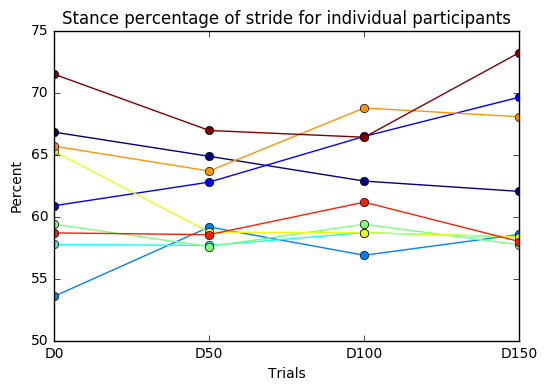

In [87]:
analysis = number_param
data = [[] for _ in range(len(trials))]
for subjectnum in range(len(subjectslist)):
    subject = subjectslist[subjectnum]
    fesside = subjects[subject][trials[0]]['AffectedSide']
    for trialnum in range(len(trials)):
        try:
            trial = trials[trialnum]
            data[trialnum].append(subjects[subject][trial][fesside+analysis])
        except KeyError:
            continue
# Plot it
box = plt.figure()
plt.boxplot(data, labels=trials_legend)
plt.title(number_title+': box plot')
plt.xlabel('Trials')
plt.ylabel('Percent')
box.savefig('Figures/'+analysis+trialtype+'boxplot.png')

# Individual plots for consistency check
jet = plt.cm.jet
colours = jet(np.linspace(0, 1, len(subjectslist))) # http://stackoverflow.com/questions/22995352/plotting-with-more-colors-in-matplotlib
boxindy = plt.figure()
plt.xticks(range(len(trials)), trials_legend)
data_trans = list(map(list, zip(*data)))
plt.title(number_title+' for individual participants')
plt.xlabel('Trials')
plt.ylabel('Percent')
for subjectnum in range(len(subjectslist)):
    plt.plot(range(len(trials)),data_trans[subjectnum], '-o', c=colours[subjectnum])
boxindy.savefig('Figures/'+analysis+trialtype+'consistency.png')

# Plot legend
figlegend = plt.figure(figsize=(2,5))
figlegend.legend(handles, labels, 'center')
figlegend.savefig('Figures/'+analysis+trialtype+'legend.png')

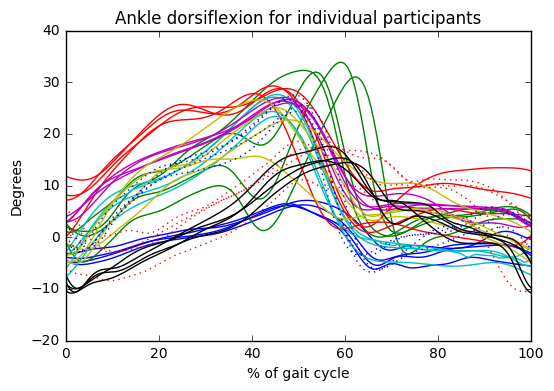

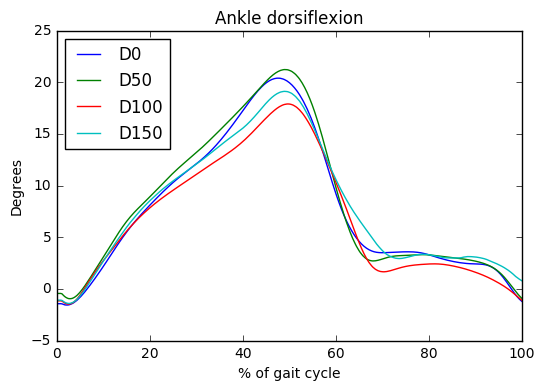

In [88]:
vector = vector_param
# make list of lists: lists 1->len(subjectslist) for trial 1, next set for trial 2, etc.
array = [[] for _ in range(len(subjectslist)*len(trials))]
colours = ['b','g','r','c','m','y','k','b:','r:','y:']
fig1 = plt.figure()
for subjectnum in range(len(subjectslist)):
    subject = subjectslist[subjectnum]
    fesside = subjects[subject][trials[0]]['AffectedSide'][0]
    for trialnum in range(len(trials)):
        trial = trials[trialnum]
        array[subjectnum+(trialnum*len(subjectslist))] = subjects[subject][trial][fesside+vector]
        #print('%s %s original length: %s' %(subject,trial,len(array[subjectnum+(trialnum*len(subjectslist))])))

        plt.plot(np.linspace(0,100,len(subjects[subject][trial][fesside+vector])), subjects[subject][trial][fesside+vector], colours[subjectnum], label=subject)

plt.title(vector_title+' for individual participants')
plt.xlabel('% of gait cycle')
plt.ylabel('Degrees')
# Reduce legend to only show one label per subject http://stackoverflow.com/questions/26337493/pyplot-combine-multiple-line-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
i =1
while i<len(labels):
    if labels[i] in labels[:i]:
        del(labels[i])
        del(handles[i])
    else:
        i +=1

# Plot legend separately
# http://stackoverflow.com/questions/4534480/get-legend-as-a-separate-picture-in-matplotlib
figlegend = plt.figure(figsize=(2,5))
figlegend.legend(handles, labels, 'center')
figlegend.savefig('Figures/'+vector+trialtype+'legend.png')

# Interpolate
longx = np.linspace(0,100,len(max(array,key=len)))
for rownum in range(len(array)):
    row = array[rownum]
    array[rownum] = np.interp(longx, np.linspace(1,100,len(row)), row)

# average subjects in each trial
avg_per_trial = [[] for _ in range(len(trials))]
for trialnum in range(len(trials)):
    trial = trials[trialnum]
    for n in range(len(array[0])):
        trialpoint = [array[x+trialnum*len(subjectslist)][n] for x in range(len(subjectslist))]
        avg_per_trial[trialnum].append(sum(trialpoint)/len(trialpoint))

# Prepare X-axis
# stackoverflow.com/questions/31003155/plotting-two-different-arrays-of-different-lengths
xaxis = avg_per_trial.copy()
for n in range(len(xaxis)):
    xaxis[n] = np.linspace(0, 100, len(avg_per_trial[n]))

# plot it
fig2 = plt.figure()
for trialnum in range(len(trials)):
    plt.plot(xaxis[trialnum], avg_per_trial[trialnum], label=trials_legend[trialnum])
plt.legend(loc=2)
plt.title(vector_title)
plt.xlabel('% of gait cycle')
plt.ylabel('Degrees')

fig1.savefig('Figures/'+vector+trialtype+'consistency.png')
fig2.savefig('Figures/'+vector+trialtype+'plot.png')